<a href="https://colab.research.google.com/github/maidyjoshi/PCVK_Ganjil_2023/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PRAKTIKUM 12 [Feature Matching, Face Detection, Face Tracking]

NAMA: MAIDY PUTRI JOSHI

NIM: 2141720060

KELAS: TI-3F

#**TUGAS PRAKTIKUM**




1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, buat notebook baru dan beri nama “Week12.ipynb”.
Kemudian import beberapa library dan akses folder yang ada di Drive Anda dengan
seperti biasa.
2. Lakukan Face Detection untuk image object lain yang tersedia pada (/images/facedet).
Tampilkan seperti pada contoh berikut.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Library


In [7]:
import cv2 as cv
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def recognitions(pathArray, cascade_paths):
    for i, imagePath in enumerate(pathArray):
        normalImage = cv.imread(imagePath)
        faci = cv.imread(imagePath)

        img_height, img_width = normalImage.shape[:2]

        fig, axes = plt.subplots(1, len(cascade_paths) * 2, figsize=(img_width / 100, img_height / 100))  # Adjust scaling factor if needed

        for j, cascade_path in enumerate(cascade_paths):
            cascadi = cv.CascadeClassifier(cascade_path)

            roi_wajah = cascadi.detectMultiScale(normalImage, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

            # Menampilkan normalImage di kolom pertama
            axes[j * 2].imshow(cv.cvtColor(normalImage, cv.COLOR_BGR2RGB))  # Menambahkan konversi warna BGR ke RGB
            axes[j * 2].set_title(f'Normal Image, Cascade {j+1}')

            # Menampilkan faci dengan kotak bounding di wajah di kolom kedua
            for (x, y, w, h) in roi_wajah:
                cv.rectangle(faci, (x, y), (x + w, y + h), (0, 255, 0), 3)  # Mengubah warna menjadi hijau

            axes[j * 2 + 1].imshow(cv.cvtColor(faci, cv.COLOR_BGR2RGB))  # Menambahkan konversi warna BGR ke RGB
            axes[j * 2 + 1].set_title(f'Faci Image, Cascade {j+1}')

        # Menampilkan plot
        plt.tight_layout()
        plt.show()


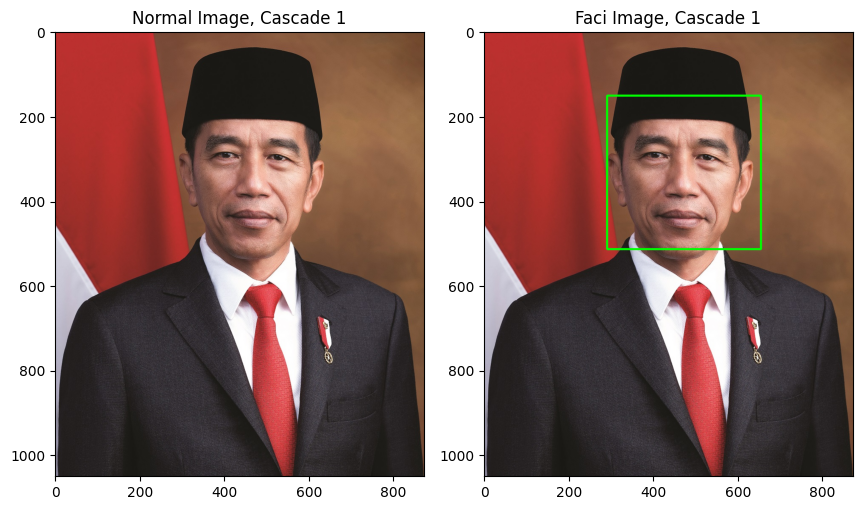

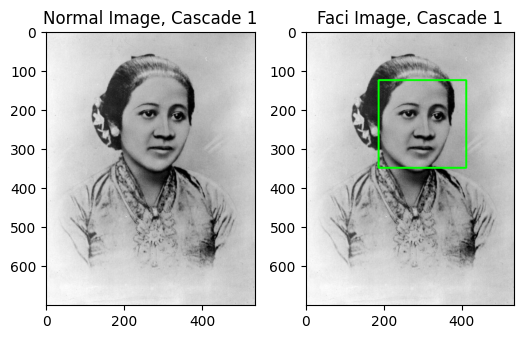

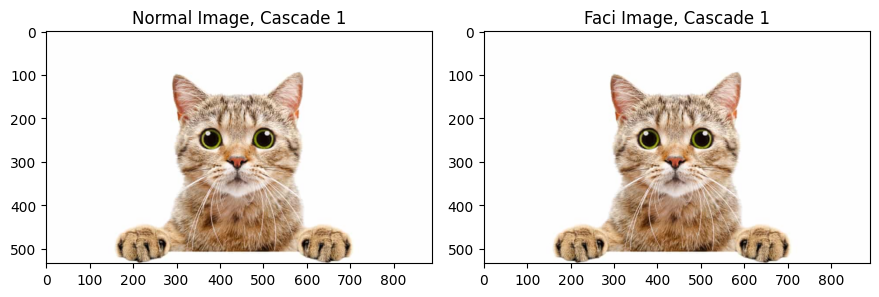

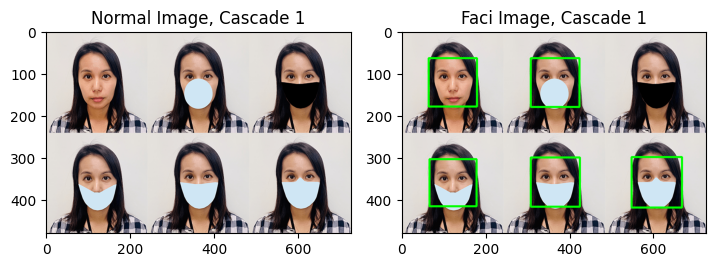

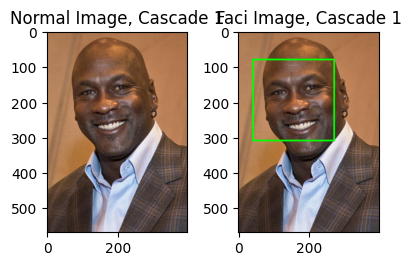

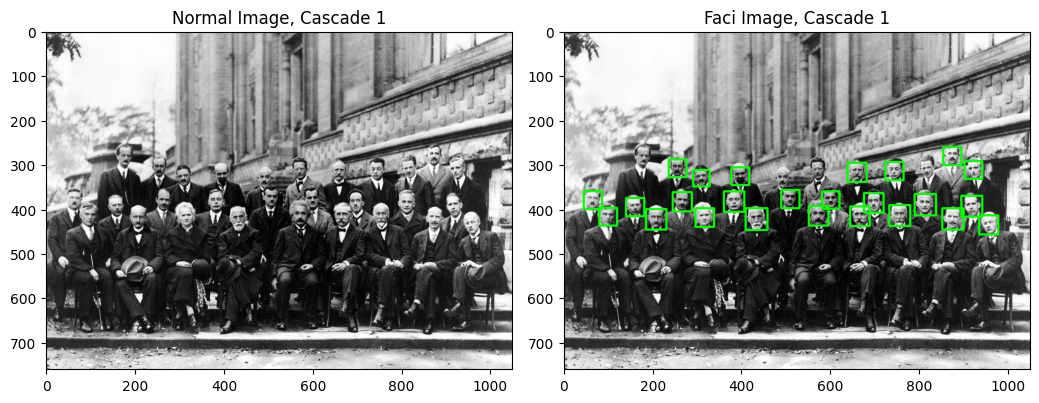

In [ ]:
import os

path=['/content/drive/MyDrive/SEMESTER5/PCVK/dataset/facedet/jokowi.jpg','/content/drive/MyDrive/SEMESTER5/PCVK/dataset/facedet/kartini.jpg','/content/drive/MyDrive/SEMESTER5/PCVK/dataset/facedet/kucing.jpg','/content/drive/MyDrive/SEMESTER5/PCVK/dataset/facedet/mask.png','/content/drive/MyDrive/SEMESTER5/PCVK/dataset/facedet/mjordan.jpg','/content/drive/MyDrive/SEMESTER5/PCVK/dataset/facedet/solvayconf.jpg']
cascade=['/content/drive/MyDrive/SEMESTER5/PCVK/dataset/facedet/haarcascade_frontalface_alt.xml']

recognitions(path,cascade)

3. Pada Soal No.2. wajah kucing tidak bisa dideteksi dengan baik. Lakukan deteksi wajah
kucing hingga muncul rectangle pada bagian wajahnya. Petunjuk pada soal ini,
perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml yang ada
jika memang telah disediakan. Jika belum ada, coba cari dengan searching melalui
search engines.

In [ ]:
catPath=['/content/drive/MyDrive/SEMESTER5/PCVK/dataset/facedet/kucing.jpg']
cascadeCat=['/content/drive/MyDrive/SEMESTER5/PCVK/dataset/facedet/haarcascade_frontalcatface.xml']

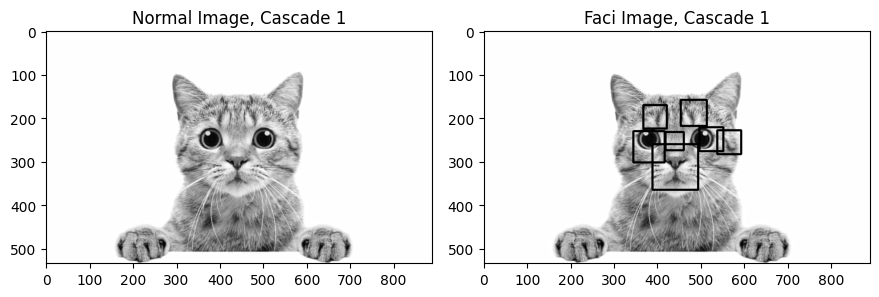

In [ ]:
recognitions(catPath,cascadeCat)

4. Cobakan juga untuk eyes detection.

In [ ]:
jokowi=['/content/drive/MyDrive/SEMESTER5/PCVK/dataset/facedet/jokowi.jpg']
eyeCascade=['/content/drive/MyDrive/SEMESTER5/PCVK/dataset/facedet/haarcascade_eye.xml']

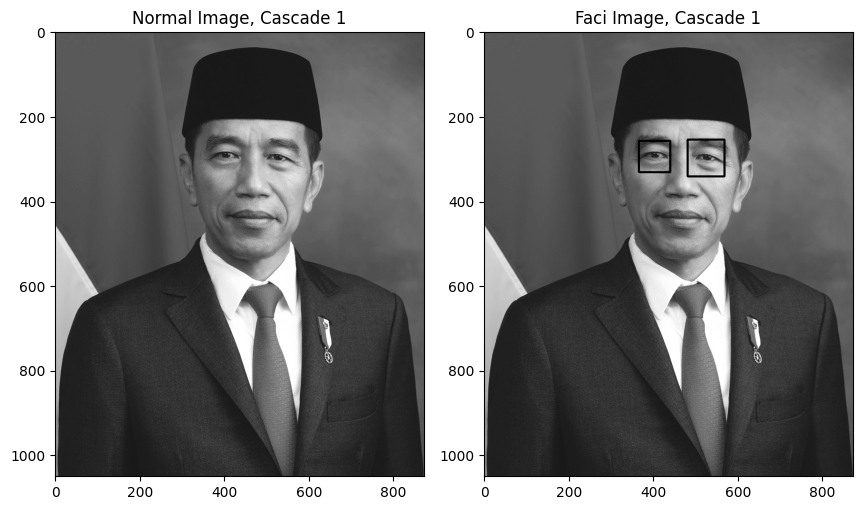

In [ ]:
recognitions(jokowi,eyeCascade)

Lakukan Face Tracking menggunakan Google Colab. Petunjuk, Tutorial selengkapnya
tentang akses kamera dan FaceDetection pada google colab dapat dilihat di link
berikut: https://www.youtube.com/watch?v=YjWh7QvVH60


<IPython.core.display.Javascript object>

(480, 640)
Saved to Joshi.jpg


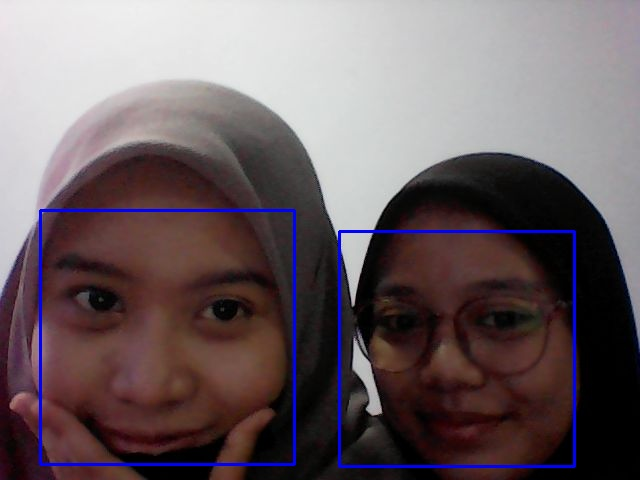

<IPython.core.display.Javascript object>

In [ ]:
# 5. Face tracking
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io
import html
import time

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv.imdecode(jpg_as_np, flags=1)

  return img

  # function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

# initialize the Haar Cascade face detection model
face_cascade = cv.CascadeClassifier('/content/drive/MyDrive/SEMESTER5/PCVK/dataset/facedet/haarcascade_frontalface_alt.xml')
def take_photo(filename='zalna.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

    # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv.imwrite(filename, img)

  return filename

try:
  filename = take_photo('Joshi.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "Status:";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '' +
          'When finished, click here or on the video to stop this demo';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

6. Lakukan Blurring pada bagian wajah yang terdeteksi. Berikut contoh keluarannya.
Petunjuk: anda dapat menggunakan cv.medianBlur untuk melakukan Blurring


In [ ]:
def overlay_faces_bnw(image_path, cascade_path):

    image = cv.imread(image_path)
    cascade = cv.CascadeClassifier(cascade_path)

    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    faces = cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        crop_image = image[y:y+h, x:x+w]
        image_blur = cv.medianBlur(crop_image, 9)
        overlay = cv.resize(image_blur, (w, h))
        image[y:y+h, x:x+w] = overlay[:, :, :3]

    # Konversi citra ke skala abu-abu (hitam-putih)
    gray_result = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    plt.imshow(gray_result, cmap='gray')
    plt.title('Result')
    plt.axis('off')
    plt.show()




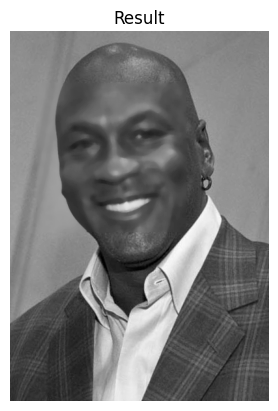

In [ ]:
image_path = '/content/drive/MyDrive/SEMESTER5/PCVK/dataset/facedet/mjordan.jpg'
cascade_path = '/content/drive/MyDrive/SEMESTER5/PCVK/dataset/facedet/haarcascade_frontalface_alt.xml'

overlay_faces_bnw(image_path, cascade_path)

 7. Lakukan segmentasi karakter pada KTP seperti gambar berikut

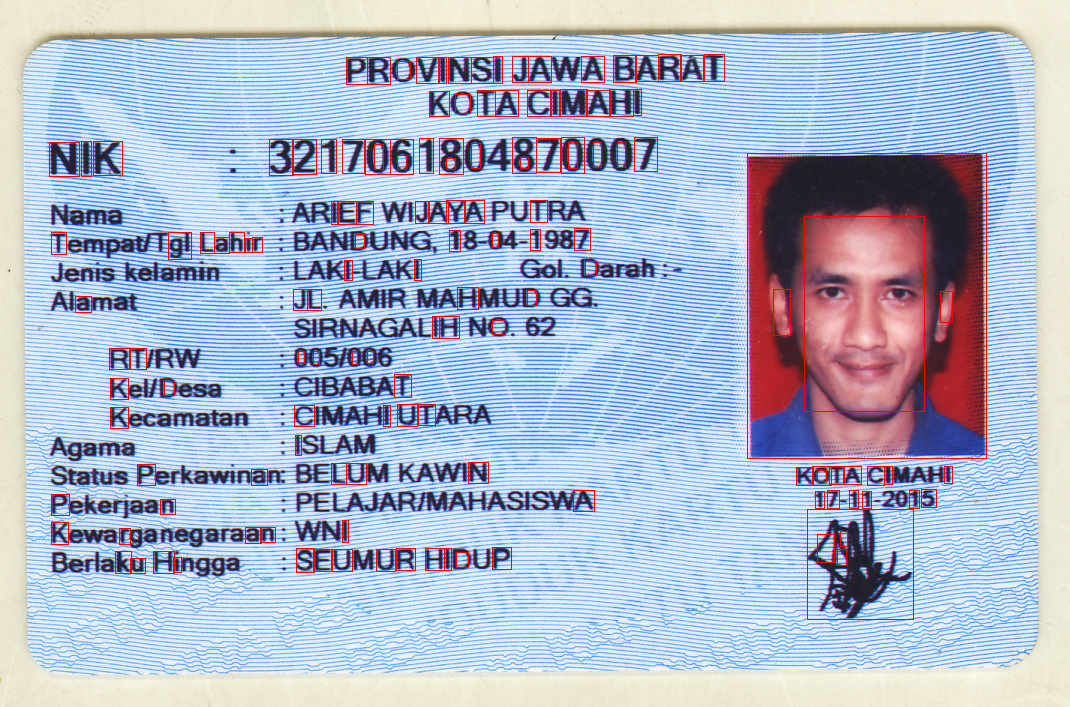

In [ ]:
import cv2
from google.colab.patches import cv2_imshow # for image display
# Baca gambar KTP
ktpImage = cv2.imread('/content/drive/MyDrive/SEMESTER5/PCVK/ktp2.png')

# Ubah gambar menjadi skala abu-abu untuk deteksi tepi
gray = cv2.cvtColor(ktpImage, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (5, 5), 0)  # (5, 5) adalah ukuran kernel Gaussian, dan 0 adalah deviation

# Thresholding untuk membuat gambar biner
ret, thresholded = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY)

# Deteksi tepi menggunakan Canny


# Temukan kontur pada gambar tepi
contours,  hierarchy= cv2.findContours(thresholded, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# Gambar kontur pada gambar asli
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv.rectangle(ktpImage, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 10 and w >= 5 and float(ras) <= 1:
      cv.rectangle(ktpImage, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Tampilkan gambar dengan kontur

cv2_imshow(ktpImage)

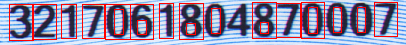

In [ ]:
ktp_crop = ktpImage[135:180, 260:666]
cv2_imshow(ktp_crop)

9. Kita akan menggunakan Deep Learning untuk melakukan pengenalan karakter
Sebelum melakukan training data, terlebih dahulu di siapkan data yang akan dilakukan
training yaitu data image nomor angka 0-9. Untuk membuat data tersebut bisa
gunakan image editor untuk dilakukan croping satu persatu. Kemudian selanjutnya
gunakan source code di bawah ini untuk proses persiapan untuk training.

In [8]:
import os
import cv2
import random
import numpy as np
import pickle
from tqdm import tqdm

# Direktori data training
DATADIR = "/content/drive/MyDrive/SEMESTER5/PCVK/dataset/training"
dirs = []
training_data = []
width, height = 100, 100

# Looping direktori data training untuk diambil nama karakternya
for char_name in sorted(os.listdir(DATADIR)):
    path = os.path.join(DATADIR, char_name)
    if os.path.isdir(path):  # Periksa apakah ini direktori
        dirs.append(char_name)

# Looping semua gambar data training untuk diubah menjadi array
for char_name in dirs:
    path = os.path.join(DATADIR, char_name)
    class_number = dirs.index(char_name)

    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (width, height))
            training_data.append([new_array, class_number])
        except Exception as e:
            pass

random.shuffle(training_data)

X = []
Y = []

for feature, label in training_data:
    X.append(feature)
    Y.append(label)

X = np.array(X).reshape(-1, width, height, 1)

# Tulis ke file pickle
with open("X.pickle", "wb") as pickle_out:
    pickle.dump(X, pickle_out)

with open("Y.pickle", "wb") as pickle_out:
    pickle.dump(Y, pickle_out)


10. Lakukan Training Data
Code berikut digunakan untuk melakukan training data

In [ ]:
pip install tensorflow

In [9]:
import pickle
import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, ZeroPadding2D
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical

# Load file pickle
with open("X.pickle", "rb") as pickle_in:
    X = pickle.load(pickle_in)

with open("Y.pickle", "rb") as pickle_in:
    Y = pickle.load(pickle_in)

# One-hot encode the labels
Y = to_categorical(Y, num_classes=34)

# Normalize pixel values to be between 0 and 1
X = np.array(X) / 255.0

# Print shape of loaded data
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

# Input layer
inputs = Input(shape=(100, 100, 1))
conv_layer = ZeroPadding2D(padding=(2, 2))(inputs)
conv_layer = Conv2D(16, (5, 5), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(64, (3, 3), strides=(1, 1), activation='relu')(conv_layer)

flatten = Flatten()(conv_layer)

fc_layer = Dense(256, activation='relu')(flatten)
fc_layer = Dense(64, activation='relu')(fc_layer)

# Output layer
outputs = Dense(34, activation='softmax')(fc_layer)

adam = Adam(lr=0.0001)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# Model training
model.fit(np.zeros((1, 100, 100, 1)), np.zeros((1, 34)), epochs=10, verbose=1)


# Save the trained model
model.save('/content/drive/MyDrive/SEMESTER5/PCVK/dataset/training')

Shape of X: (0, 100, 100, 1)
Shape of Y: (0, 34)


Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 97ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 83ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 78ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 81ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 97ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 87ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 78ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 79ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 77ms/step - loss: 0.0000e+00 - accuracy

In [14]:
import os
import cv2
import tensorflow as tf
import numpy as np

data_dir_training = "/content/drive/MyDrive/SEMESTER5/PCVK/dataset"
data_dir_testing = "/content/drive/MyDrive/SEMESTER5/PCVK/dataset"
dirs = []
width, height = 100, 100

# Load the model
model_path = "/content/drive/MyDrive/SEMESTER5/PCVK/dataset/training"
model = tf.keras.models.load_model(model_path)

# Load class names
for char_name in sorted(os.listdir(data_dir_training)):
    dirs.append(char_name)

# Process testing data
for car in sorted(os.listdir(data_dir_testing)):
    temp = ""
    car_dir = os.path.join(data_dir_testing, car)

    # Skip non-directory items in the testing directory
    if not os.path.isdir(car_dir):
        continue

    for char_img in sorted(os.listdir(car_dir)):
        img_path = os.path.join(car_dir, char_img)
        img_array = cv2.imread(img_path, cv2.IMREAD_ANYCOLOR)

        # Resize image
        new_array = cv2.resize(img_array, (width, height))

        # Preprocess image
        new_array = np.array(new_array).reshape(-1, width, height, 3)
        new_array = new_array / 255.0

        # Make prediction
        prediction = model.predict(new_array)
        temp += dirs[np.argmax(prediction[0])]

    print("folder name: {} no: {}".format(car, temp))

ValueError: ignored